In [1]:
from   faraway.datasets import (
    cheddar, mba, prostate, punting, sat, teengamb)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 1. 

In [2]:
pros = prostate.load()
pros.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579819,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
1,-0.994252,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252
2,-0.510826,2.6912,74,-1.386294,0,-1.38629,7,20,-0.16252
3,-1.203973,3.2828,58,-1.386294,0,-1.38629,6,0,-0.16252
4,0.751416,3.4324,62,-1.386294,0,-1.38629,6,0,0.37156


In [3]:
lmod = smf.ols(
    'lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason '
    '+ pgg45',
    pros
).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     20.86
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           2.24e-17
Time:                        11:54:48   Log-Likelihood:                -99.476
No. Observations:                  97   AIC:                             217.0
Df Residuals:                      88   BIC:                             240.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6693      1.296      0.516      0.607      -1.907       3.246
lcavol         0.5870      0.088      6.677      0.000       0.412       0.762
lweight        0.4545      0.170      2.673      0.009       0.117       0.792
age           -0.0196      0.011     -1.758      0.082      -0.042       0.003
lbph           0.1071      0.058      1.832      0.070      -0.009       0.223
svi            0.7662      0.244      3.136      0.002       0.281       1.252
lcp           -0.1055      0.091     -1.159      0.250      -0.286       0.075
gleason        0.0451      0.157      0.287      0.775      -0.268       0.358
pgg45          0.0045      0.004      1.024      0.309      -0.004       0.013
==============================================================================
Omnibus:                        0.235   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.026
Skew:                          -0.017   Prob(JB):                        0.987
Kurtosis:                       3.073   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
# b) Conclusion p between 0.05 and 0.1
df_resid = 88
for ci in [0.9, 0.95]:
    qt = np.array(sp.stats.t.interval(ci, df_resid))
    ci_age = lmod.params[3] + lmod.bse[3] * qt
    print(f'{ci}: {ci_age}')


0.9: [-0.0382102  -0.00106415]
0.95: [-0.04184062  0.00256627]


In [5]:
# c)
ITERS = 4000
fs = []
lmod = smf.ols('lpsa ~ age', pros).fit()
               
for i in range(ITERS):
    pros['y_samp'] = np.random.permutation(pros.lpsa.copy())
    lmod_i = smf.ols('y_samp ~ age', pros).fit()
    fs.append(lmod_i.fvalue)
    
np.mean(fs > lmod.fvalue)

0.09475

In [6]:
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.813
Date:                Wed, 17 Jul 2024   Prob (F-statistic):             0.0968
Time:                        11:54:53   Log-Likelihood:                -149.64
No. Observations:                  97   AIC:                             303.3
Df Residuals:                      95   BIC:                             308.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7991      1.008      0.793      0.430      -1.202       2.800
age            0.0263      0.016      1.677      0.097      -0.005       0.057
==============================================================================
Omnibus:                        2.538   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.096
Skew:                           0.152   Prob(JB):                        0.351
Kurtosis:                       3.653   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# d)
lmod_red = smf.ols('lpsa ~ -1 + age + pgg45', pros).fit()
lmod_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   lpsa   R-squared (uncentered):                   0.851
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              272.2
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                    4.67e-40
Time:                        11:54:53   Log-Likelihood:                         -142.64
No. Observations:                  97   AIC:                                      289.3
Df Residuals:                      95   BIC:                                      294.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0326      0.002     14.298      0.000       0.028       0.037
pgg45          0.0155      0.004      3.935      0.000       0.008       0.023
==============================================================================
Omnibus:                        5.669   Durbin-Watson:                   0.449
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                6.127
Skew:                           0.329   Prob(JB):                       0.0467
Kurtosis:                       4.041   Cond. No.                         2.77
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. 

In [8]:
ched = cheddar.load()
print(ched.shape)
ched.head()

(30, 4)


,taste,Acetic,H2S,Lactic
0,12.3,4.543,3.135,0.86
1,20.9,5.159,5.043,1.53
2,39.0,5.366,5.438,1.57
3,47.9,5.759,7.496,1.81
4,5.6,4.663,3.807,0.99


In [9]:
# a)
lm = smf.ols('taste ~ Acetic + H2S + Lactic', ched).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  taste   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     16.22
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           3.81e-06
Time:                        11:54:53   Log-Likelihood:                -109.89
No. Observations:                  30   AIC:                             227.8
Df Residuals:                      26   BIC:                             233.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.8768     19.735     -1.463      0.155     -69.444      11.690
Acetic         0.3277      4.460      0.073      0.942      -8.839       9.495
H2S            3.9118      1.248      3.133      0.004       1.346       6.478
Lactic        19.6705      8.629      2.280      0.031       1.933      37.408
==============================================================================
Omnibus:                        1.923   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.143
Skew:                           0.474   Prob(JB):                        0.565
Kurtosis:                       3.130   Cond. No.                         92.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# b)
ched['AceticRaw'] = np.exp(ched.Acetic)
ched['H2SRaw'] = np.exp(ched.H2S)
lm2 = smf.ols('taste ~ AceticRaw + H2SRaw + Lactic', ched).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  taste   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     11.75
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           4.75e-05
Time:                        11:54:53   Log-Likelihood:                -112.86
No. Observations:                  30   AIC:                             233.7
Df Residuals:                      26   BIC:                             239.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.9727     11.268     -1.684      0.104     -42.135       4.189
AceticRaw      0.0189      0.016      1.210      0.237      -0.013       0.051
H2SRaw         0.0008      0.000      1.831      0.079    -9.4e-05       0.002
Lactic        25.0074      9.062      2.760      0.010       6.380      43.635
==============================================================================
Omnibus:                        0.802   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.719
Skew:                           0.347   Prob(JB):                        0.698
Kurtosis:                       2.693   Cond. No.                     4.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.

In [11]:
teen = teengamb.load()
teen.head()

,sex,status,income,verbal,gamble
0,1,51,2.0,8,0.0
1,1,28,2.5,8,0.0
2,1,37,2.0,6,0.0
3,1,28,7.0,4,7.3
4,1,65,2.0,8,19.6


In [12]:
lm = smf.ols('gamble ~ sex + status + income + verbal', teen).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gamble   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     11.69
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           1.81e-06
Time:                        11:54:53   Log-Likelihood:                -210.78
No. Observations:                  47   AIC:                             431.6
Df Residuals:                      42   BIC:                             440.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5557     17.197      1.312      0.197     -12.149      57.260
sex          -22.1183      8.211     -2.694      0.010     -38.689      -5.548
status         0.0522      0.281      0.186      0.853      -0.515       0.620
income         4.9620      1.025      4.839      0.000       2.893       7.031
verbal        -2.9595      2.172     -1.362      0.180      -7.343       1.424
==============================================================================
Omnibus:                       31.143   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.046
Skew:                           1.604   Prob(JB):                     1.14e-22
Kurtosis:                       9.427   Cond. No.                         264.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sig: sex, income

sex 1 (f) spend 22.12 less than m on avg (all else being equal)

In [13]:
lm.conf_int()

,0,1
Intercept,-12.148904,57.260205
sex,-38.689030,-5.547630
status,-0.515072,0.619540
income,2.892654,7.031305
verbal,-7.343070,1.424083


In [14]:
lm2 = smf.ols('gamble ~ income', teen).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gamble   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     28.41
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           3.05e-06
Time:                        11:54:53   Log-Likelihood:                -216.86
No. Observations:                  47   AIC:                             437.7
Df Residuals:                      45   BIC:                             441.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3246      6.030     -1.049      0.300     -18.469       5.820
income         5.5205      1.036      5.330      0.000       3.434       7.607
==============================================================================
Omnibus:                       31.612   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.758
Skew:                           1.673   Prob(JB):                     9.76e-22
Kurtosis:                       9.182   Cond. No.                         9.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
lm.compare_f_test(lm2)

(4.133761123980709, 0.011772108331008826, 3.0)

In [16]:
lm3 = smf.ols('gamble ~ sex + income', teen).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gamble   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     22.12
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           2.24e-07
Time:                        11:54:53   Log-Likelihood:                -212.00
No. Observations:                  47   AIC:                             430.0
Df Residuals:                      44   BIC:                             435.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0408      6.394      0.632      0.531      -8.846      16.928
sex          -21.6344      6.809     -3.177      0.003     -35.357      -7.912
income         5.1716      0.951      5.438      0.000       3.255       7.088
==============================================================================
Omnibus:                       35.132   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.900
Skew:                           1.792   Prob(JB):                     3.76e-29
Kurtosis:                      10.348   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# lm3 is better, but signif so?
lm.compare_f_test(lm3)

(1.1241616036441315, 0.3345044702685281, 2.0)

In [18]:
# no (p = 0.33), but should be preferred as the simpler model

### 4.

In [19]:
s = sat.load()
print(s.shape)
s.head()

(50, 7)


,expend,ratio,salary,takers,verbal,math,total
0,4.405,17.2,31.144,8,491,538,1029
1,8.963,17.6,47.951,47,445,489,934
2,4.778,19.3,32.175,27,448,496,944
3,4.459,17.1,28.934,6,482,523,1005
4,4.992,24.0,41.078,45,417,485,902


In [20]:
lm = smf.ols('total ~ expend + ratio + salary', s).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4.066
Date:                Wed, 17 Jul 2024   Prob (F-statistic):             0.0121
Time:                        11:54:53   Log-Likelihood:                -280.32
No. Observations:                  50   AIC:                             568.6
Df Residuals:                      46   BIC:                             576.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1069.2342    110.925      9.639      0.000     845.954    1292.514
expend        16.4689     22.050      0.747      0.459     -27.915      60.853
ratio          6.3303      6.542      0.968      0.338      -6.838      19.499
salary        -8.8226      4.697     -1.878      0.067     -18.277       0.632
==============================================================================
Omnibus:                        0.621   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.698
Skew:                           0.070   Prob(JB):                        0.705
Kurtosis:                       2.438   Cond. No.                         455.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
lm2 = smf.ols('total ~ expend + ratio + salary + takers', s).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     52.88
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           1.92e-16
Time:                        11:54:53   Log-Likelihood:                -242.68
No. Observations:                  50   AIC:                             495.4
Df Residuals:                      45   BIC:                             504.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1045.9715     52.870     19.784      0.000     939.486    1152.457
expend         4.4626     10.547      0.423      0.674     -16.779      25.704
ratio         -3.6242      3.215     -1.127      0.266     -10.100       2.852
salary         1.6379      2.387      0.686      0.496      -3.170       6.446
takers        -2.9045      0.231    -12.559      0.000      -3.370      -2.439
==============================================================================
Omnibus:                        1.325   Durbin-Watson:                   2.452
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.572
Skew:                          -0.014   Prob(JB):                        0.751
Kurtosis:                       3.523   Cond. No.                         654.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
lm2.compare_f_test(lm)

(157.73788851100608, 2.6065587532965426e-16, 1.0)

### 6. 

In [23]:
m = mba.load()
print(m.shape)
m.head()

(39, 5)


,happy,money,sex,love,work
0,10,36,0,3,4
1,8,47,1,3,1
2,8,53,0,3,5
3,8,35,1,3,3
4,4,88,1,1,2


In [24]:
lm = smf.ols('happy ~ money + sex + love + work', m).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     20.83
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           9.36e-09
Time:                        11:54:53   Log-Likelihood:                -54.877
No. Observations:                  39   AIC:                             119.8
Df Residuals:                      34   BIC:                             128.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0721      0.853     -0.085      0.933      -1.805       1.660
money          0.0096      0.005      1.837      0.075      -0.001       0.020
sex           -0.1490      0.419     -0.356      0.724      -1.000       0.702
love           1.9193      0.295      6.496      0.000       1.319       2.520
work           0.4761      0.199      2.388      0.023       0.071       0.881
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.170
Skew:                          -0.155   Prob(JB):                        0.918
Kurtosis:                       3.093   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
lm.conf_int(0.01)

,0,1
Intercept,-2.398154,2.253992
money,-0.004645,0.023801
sex,-1.290909,0.992894
love,1.113171,2.725387
work,-0.067933,1.020091


Only love is significant predictor at alpha = 0.01

In [26]:
m.happy.value_counts()

happy
8     14
7      8
5      5
4      4
9      3
6      2
10     1
3      1
2      1
Name: count, dtype: int64

In [27]:
N_PERM = 4000
f_stats = np.zeros(N_PERM)
for i in range(N_PERM):
    m['ysamp'] = np.random.permutation(m.happy.copy())
    lmi = smf.ols('ysamp ~ money + sex + love + work', m).fit()
    f_stats[i] = lmi.fvalue

In [28]:
p_est = np.mean(f_stats > lm.fvalue)
p_est  # est p val of mod as a whole

0.0

In [29]:
lm.tvalues[1], lm.pvalues[1]

(1.8373571096868833, 0.07491036482395506)

In [30]:
t_stats = []
for i in range(N_PERM):
    m['ssamp'] = np.random.permutation(m.money)
    lmi = (
        smf.ols('happy ~ ssamp + sex + love + work', m).fit())
    t_stats.append(lmi.tvalues[1])

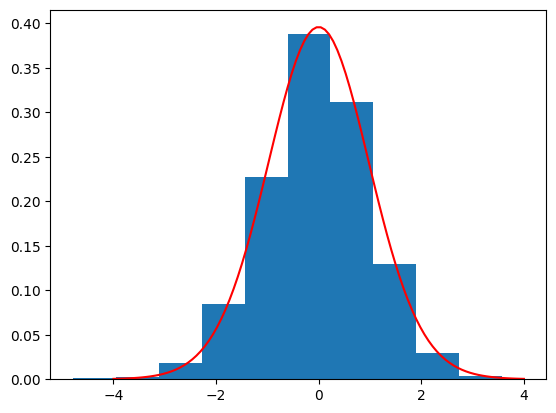

In [31]:
plt.hist(t_stats, density=True)
xv = np.linspace(-4, 4, 100)
yv = sp.stats.t.pdf(xv, df=34)
plt.plot(xv, yv, color='r');

In [32]:
p_money = np.mean(np.fabs(t_stats) > np.fabs(lm.tvalues[1]))
p_money

0.07325

In [33]:
reps = 40#00
coef_mat = np.empty((reps, 5))
resids = lm.resid
preds = lm.predict()
for i in range(reps):
    m['y_samp'] = preds + np.random.choice(resids, 39)
    lmodi = smf.ols(
        'y_samp ~ money + sex + love + work',
        m
    ).fit()
    coef_mat[i, :] = lmodi.params
coef_mat = pd.DataFrame(
    coef_mat, 
    columns=(
        'intercept', 'money', 'sex', 'love', 'worke'))
coef_mat.quantile((0.025, 0.975))

,intercept,money,sex,love,worke
0.025,-2.122382,0.002977,-0.961000,1.338633,0.263334
0.975,1.403319,0.016114,0.588602,2.300721,0.804967


`money` not signif here (consistent with above mod)

### 7.

In [34]:
punt = punting.load()
print(punt.shape)
punt.head()

(13, 7)


,Distance,Hang,RStr,LStr,RFlex,LFlex,OStr
0,162.5,4.75,170,170,106,106,240.57
1,144.0,4.07,140,130,92,93,195.49
2,147.5,4.04,180,170,93,78,152.99
3,163.5,4.18,160,160,103,93,197.09
4,192.0,4.35,170,150,104,93,266.56


In [35]:
lm = smf.ols('Distance ~ RStr + LStr + RFlex + LFlex', punt).fit()
lm.summary()

/Users/damiansp/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Distance   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     5.590
Date:                Wed, 17 Jul 2024   Prob (F-statistic):             0.0190
Time:                        11:55:11   Log-Likelihood:                -51.597
No. Observations:                  13   AIC:                             113.2
Df Residuals:                       8   BIC:                             116.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -79.6236     65.594     -1.214      0.259    -230.883      71.635
RStr           0.5116      0.486      1.054      0.323      -0.608       1.631
LStr          -0.1862      0.513     -0.363      0.726      -1.369       0.997
RFlex          2.3745      1.437      1.652      0.137      -0.940       5.689
LFlex         -0.5277      0.826     -0.639      0.541      -2.431       1.376
==============================================================================
Omnibus:                        1.661   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                0.865
Skew:                          -0.146   Prob(JB):                        0.649
Kurtosis:                       1.771   Cond. No.                     3.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

No signif predictors

p(F) = 0.019 indicating mod as whole is signif.

In [39]:
RStr = [round(0.5116 - 1.96*0.486, 3),  round(0.5116 + 1.96*0.486, 3)]
LStr = [round(-0.1862 - 1.96*0.513, 3), round(-0.1862 + 1.96*0.513, 3)]
RStr, LStr

([-0.441, 1.464], [-1.192, 0.819])